# Radiology Dataset EDA
Exploring the `unsloth/Radiology_mini` dataset for vision-language model training.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datasets import load_dataset
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import textwrap

/workspace/project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plt.style.use("default")
sns.set_palette("husl")

In [3]:
# Load the dataset
print("Loading dataset...")
dataset = load_dataset("unsloth/Radiology_mini")
print("Dataset loaded successfully!")
print(f"Available splits: {list(dataset.keys())}")


Loading dataset...
Dataset loaded successfully!
Available splits: ['train', 'test']


In [4]:
# Basic dataset info
for split_name, split_data in dataset.items():
    print(f"\n{split_name.upper()} split:")
    print(f"  Number of samples: {len(split_data)}")
    print(f"  Features: {split_data.features}")
    print(f"  Column names: {split_data.column_names}")



TRAIN split:
  Number of samples: 1978
  Features: {'image': Image(mode=None, decode=True), 'image_id': Value('string'), 'caption': Value('string'), 'cui': List(Value('string'))}
  Column names: ['image', 'image_id', 'caption', 'cui']

TEST split:
  Number of samples: 327
  Features: {'image': Image(mode=None, decode=True), 'image_id': Value('string'), 'caption': Value('string'), 'cui': List(Value('string'))}
  Column names: ['image', 'image_id', 'caption', 'cui']


In [5]:
# Look at the first few examples
train_data = dataset["train"]
print("First 3 examples (text only):")
for i in range(3):
    example = train_data[i]
    print(f"\nExample {i + 1}:")
    for key, value in example.items():
        if key != "image":  # Skip image for text display
            print(f"  {key}: {value}")


First 3 examples (text only):

Example 1:
  image_id: ROCOv2_2023_train_054311
  caption: Panoramic radiography shows an osteolytic lesion in the right posterior maxilla with resorption of the floor of the maxillary sinus (arrows).
  cui: ['C1306645', 'C0037303']

Example 2:
  image_id: ROCOv2_2023_train_058916
  caption: ERCP showing distal CBD compression. ERCP - endoscopic retrograde cholangiopancreatography; CBD - common bile duct
  cui: ['C1306645', 'C0000726']

Example 3:
  image_id: ROCOv2_2023_train_029859
  caption: The film of upper gastrointestinal radiography.The film of upper gastrointestinal radiography with diatrizoate meglumine as the contrast medium on postoperative day 7 for one patient underwent the modified delta-shaped gastroduodenostomy. The inner diameter of the anastomosis was measured the length of the white arrow as shown in the figure.
  cui: ['C0002978']


/tmp/ipykernel_256625/3264858259.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot([caption_lengths, char_lengths], labels=["Words", "Characters"])


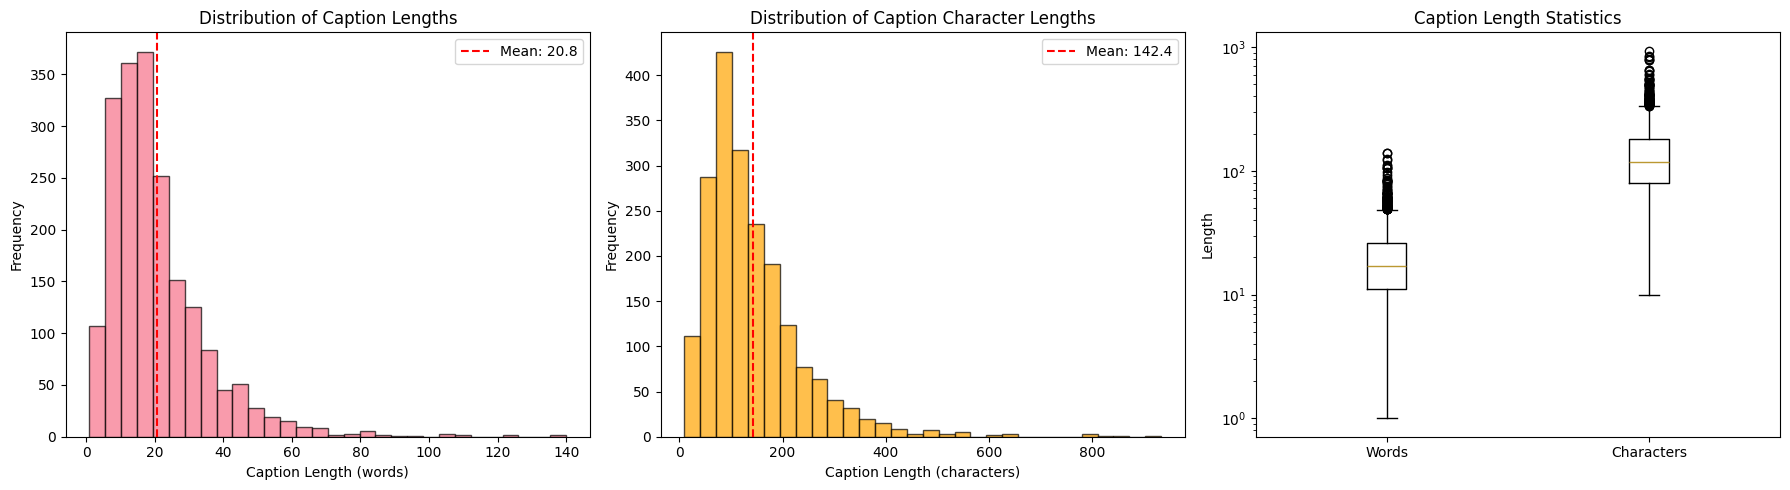

Caption statistics:
  Word count - Mean: 20.8, Median: 17.0
  Character count - Mean: 142.4, Median: 117.0
  Min words: 1, Max words: 140


In [6]:
# Text analysis - caption lengths
captions = [example["caption"] for example in train_data]
caption_lengths = [len(caption.split()) for caption in captions]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Caption length distribution
axes[0].hist(caption_lengths, bins=30, alpha=0.7, edgecolor="black")
axes[0].set_xlabel("Caption Length (words)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Caption Lengths")
axes[0].axvline(
    np.mean(caption_lengths),
    color="red",
    linestyle="--",
    label=f"Mean: {np.mean(caption_lengths):.1f}",
)
axes[0].legend()

# Character length distribution
char_lengths = [len(caption) for caption in captions]
axes[1].hist(char_lengths, bins=30, alpha=0.7, edgecolor="black", color="orange")
axes[1].set_xlabel("Caption Length (characters)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Caption Character Lengths")
axes[1].axvline(
    np.mean(char_lengths),
    color="red",
    linestyle="--",
    label=f"Mean: {np.mean(char_lengths):.1f}",
)
axes[1].legend()

# Box plot
axes[2].boxplot([caption_lengths, char_lengths], labels=["Words", "Characters"])
axes[2].set_ylabel("Length")
axes[2].set_title("Caption Length Statistics")
axes[2].set_yscale("log")

plt.tight_layout()
plt.show()

print("Caption statistics:")
print(
    f"  Word count - Mean: {np.mean(caption_lengths):.1f}, Median: {np.median(caption_lengths):.1f}"
)
print(
    f"  Character count - Mean: {np.mean(char_lengths):.1f}, Median: {np.median(char_lengths):.1f}"
)
print(f"  Min words: {min(caption_lengths)}, Max words: {max(caption_lengths)}")


Total unique words: 4961
Total words: 41247

Top 20 most common words:
  the: 3051
  of: 1938
  and: 923
  in: 828
  a: 801
  with: 646
  showing: 562
  arrow: 482
  ct: 482
  right: 463
  left: 454
  image: 315
  to: 309
  chest: 279
  scan: 277
  shows: 256
  is: 237
  tomography: 234
  at: 231
  computed: 222


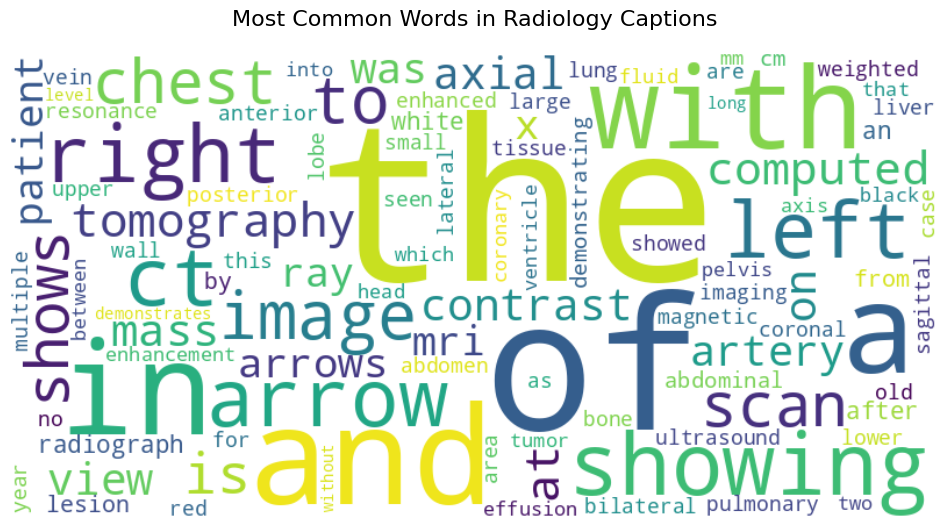

In [7]:
# Word frequency analysis
from collections import Counter
import re

# Clean and tokenize text
all_words = []
for caption in captions:
    # Convert to lowercase, remove punctuation, split
    words = re.findall(r"\b[a-zA-Z]+\b", caption.lower())
    all_words.extend(words)

word_freq = Counter(all_words)
print(f"Total unique words: {len(word_freq)}")
print(f"Total words: {len(all_words)}")

# Most common words
print("\nTop 20 most common words:")
for word, count in word_freq.most_common(20):
    print(f"  {word}: {count}")

# %%
# Word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(
    width=800, height=400, background_color="white", max_words=100, colormap="viridis"
).generate_from_frequencies(word_freq)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Radiology Captions", fontsize=16, pad=20)
plt.show()


Analyzing images...


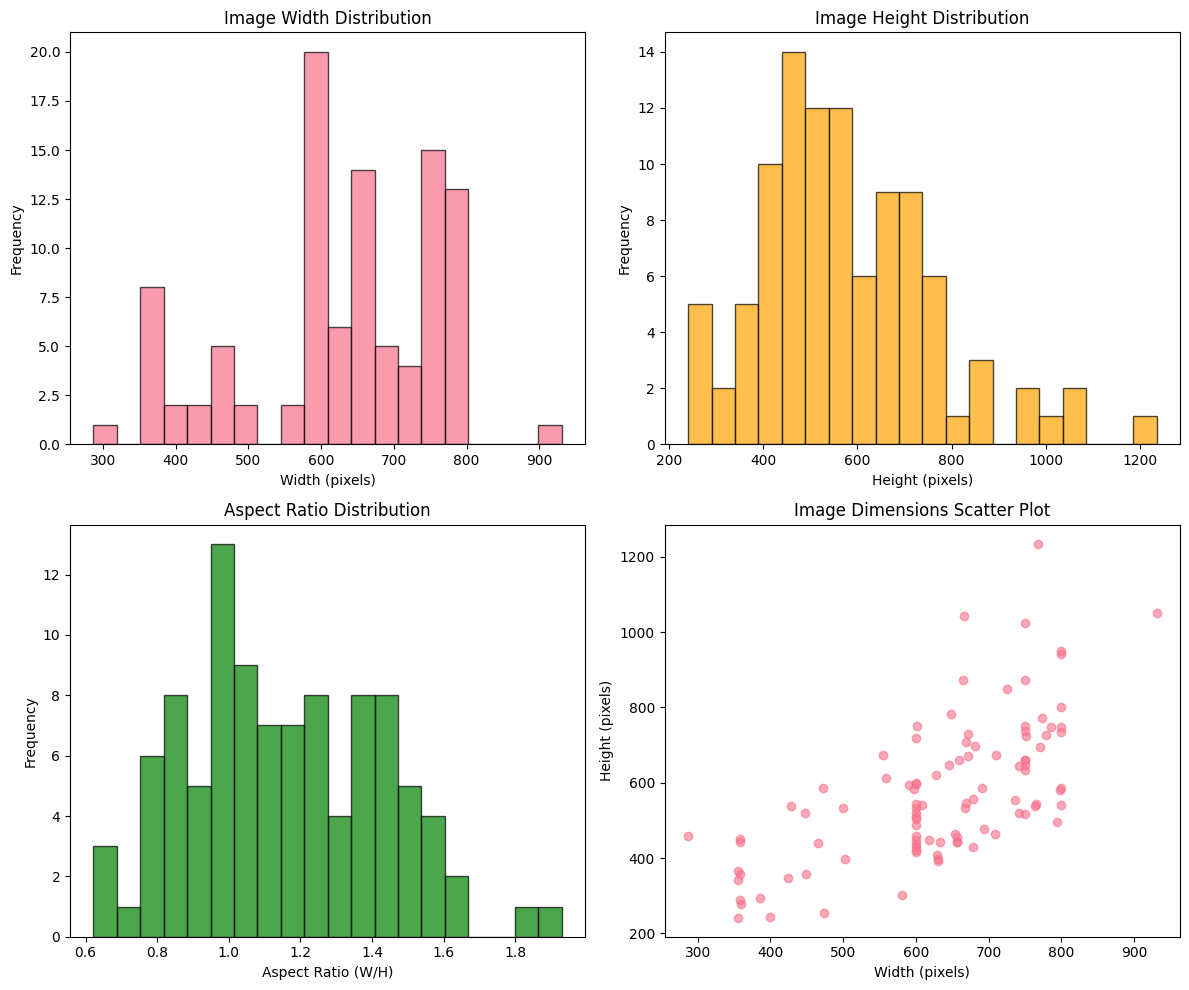

Image statistics (first 100 images):
  Width - Mean: 630, Range: 287-931
  Height - Mean: 575, Range: 241-1235
  Aspect ratio - Mean: 1.16, Range: 0.62-1.93


In [8]:
# Image analysis
print("Analyzing images...")
images = [
    train_data[i]["image"] for i in range(min(100, len(train_data)))
]  # Sample first 100

# Image dimensions
widths = []
heights = []
aspects = []

for img in images:
    w, h = img.size
    widths.append(w)
    heights.append(h)
    aspects.append(w / h)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Width distribution
axes[0, 0].hist(widths, bins=20, alpha=0.7, edgecolor="black")
axes[0, 0].set_xlabel("Width (pixels)")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Image Width Distribution")

# Height distribution
axes[0, 1].hist(heights, bins=20, alpha=0.7, edgecolor="black", color="orange")
axes[0, 1].set_xlabel("Height (pixels)")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Image Height Distribution")

# Aspect ratio
axes[1, 0].hist(aspects, bins=20, alpha=0.7, edgecolor="black", color="green")
axes[1, 0].set_xlabel("Aspect Ratio (W/H)")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_title("Aspect Ratio Distribution")

# Scatter plot of dimensions
axes[1, 1].scatter(widths, heights, alpha=0.6)
axes[1, 1].set_xlabel("Width (pixels)")
axes[1, 1].set_ylabel("Height (pixels)")
axes[1, 1].set_title("Image Dimensions Scatter Plot")

plt.tight_layout()
plt.show()

print("Image statistics (first 100 images):")
print(f"  Width - Mean: {np.mean(widths):.0f}, Range: {min(widths)}-{max(widths)}")
print(f"  Height - Mean: {np.mean(heights):.0f}, Range: {min(heights)}-{max(heights)}")
print(
    f"  Aspect ratio - Mean: {np.mean(aspects):.2f}, Range: {min(aspects):.2f}-{max(aspects):.2f}"
)


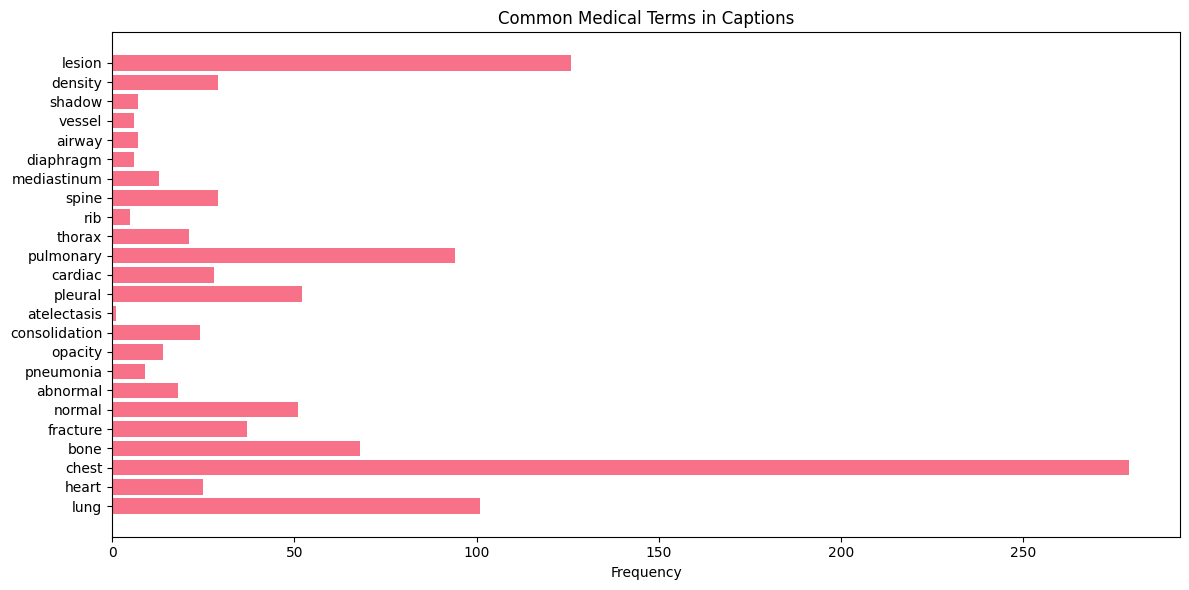

Analyzing images...


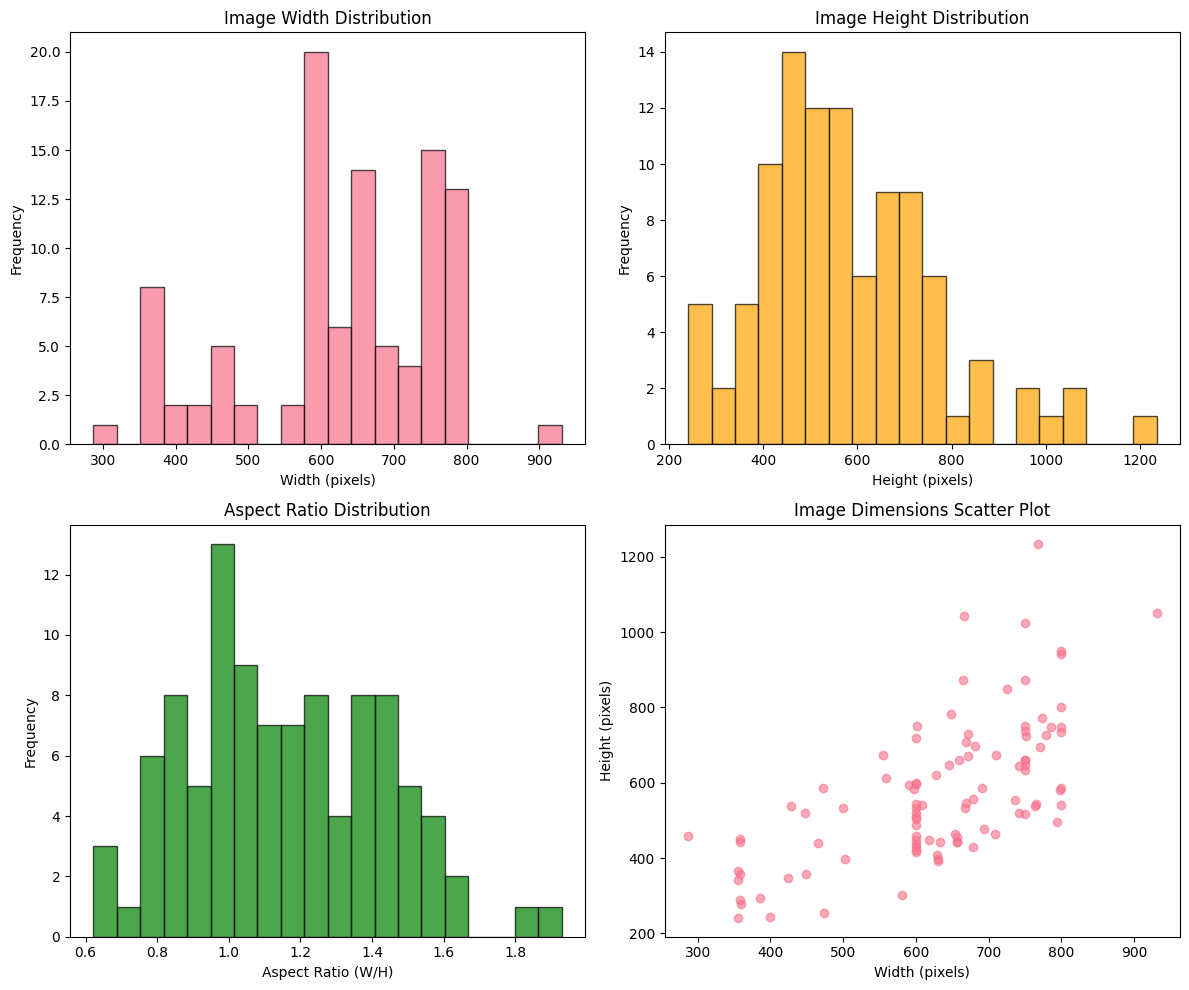

Image statistics (first 100 images):
  Width - Mean: 630, Range: 287-931
  Height - Mean: 575, Range: 241-1235
  Aspect ratio - Mean: 1.16, Range: 0.62-1.93


In [9]:
# Medical terms analysis
medical_terms = [
    "lung",
    "heart",
    "chest",
    "bone",
    "fracture",
    "normal",
    "abnormal",
    "pneumonia",
    "opacity",
    "consolidation",
    "atelectasis",
    "pleural",
    "cardiac",
    "pulmonary",
    "thorax",
    "rib",
    "spine",
    "mediastinum",
    "diaphragm",
    "airway",
    "vessel",
    "shadow",
    "density",
    "lesion",
]

medical_word_counts = {term: word_freq.get(term, 0) for term in medical_terms}
medical_word_counts = {k: v for k, v in medical_word_counts.items() if v > 0}

plt.figure(figsize=(12, 6))
terms = list(medical_word_counts.keys())
counts = list(medical_word_counts.values())

plt.barh(terms, counts)
plt.xlabel("Frequency")
plt.title("Common Medical Terms in Captions")
plt.tight_layout()
plt.show()

# %%
# Image analysis
print("Analyzing images...")
images = [
    train_data[i]["image"] for i in range(min(100, len(train_data)))
]  # Sample first 100

# Image dimensions
widths = []
heights = []
aspects = []

for img in images:
    w, h = img.size
    widths.append(w)
    heights.append(h)
    aspects.append(w / h)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Width distribution
axes[0, 0].hist(widths, bins=20, alpha=0.7, edgecolor="black")
axes[0, 0].set_xlabel("Width (pixels)")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Image Width Distribution")

# Height distribution
axes[0, 1].hist(heights, bins=20, alpha=0.7, edgecolor="black", color="orange")
axes[0, 1].set_xlabel("Height (pixels)")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Image Height Distribution")

# Aspect ratio
axes[1, 0].hist(aspects, bins=20, alpha=0.7, edgecolor="black", color="green")
axes[1, 0].set_xlabel("Aspect Ratio (W/H)")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_title("Aspect Ratio Distribution")

# Scatter plot of dimensions
axes[1, 1].scatter(widths, heights, alpha=0.6)
axes[1, 1].set_xlabel("Width (pixels)")
axes[1, 1].set_ylabel("Height (pixels)")
axes[1, 1].set_title("Image Dimensions Scatter Plot")

plt.tight_layout()
plt.show()

print("Image statistics (first 100 images):")
print(f"  Width - Mean: {np.mean(widths):.0f}, Range: {min(widths)}-{max(widths)}")
print(f"  Height - Mean: {np.mean(heights):.0f}, Range: {min(heights)}-{max(heights)}")
print(
    f"  Aspect ratio - Mean: {np.mean(aspects):.2f}, Range: {min(aspects):.2f}-{max(aspects):.2f}"
)


Sample images from training set:


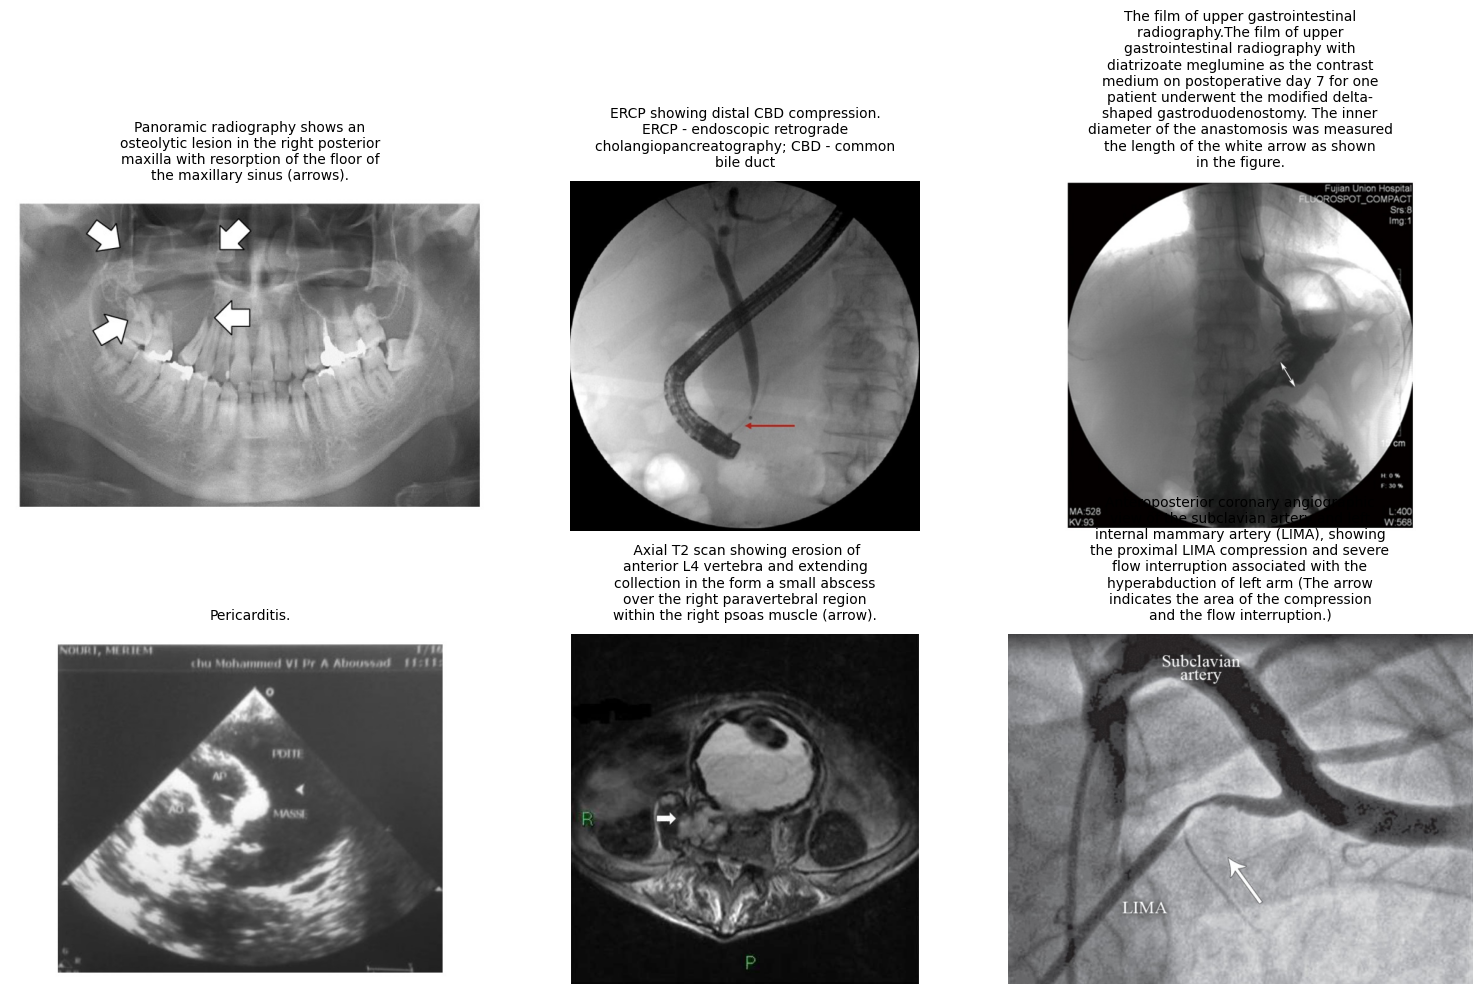

In [10]:
# Display sample images with captions
def display_samples(dataset, n_samples=6, cols=3):
    """Display sample images with their captions"""
    rows = (n_samples + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

    if rows == 1:
        axes = axes.reshape(1, -1)

    for i in range(n_samples):
        row = i // cols
        col = i % cols

        if i < len(dataset):
            sample = dataset[i]
            image = sample["image"]
            caption = sample["caption"]

            axes[row, col].imshow(image, cmap="gray")
            axes[row, col].axis("off")

            # Wrap long captions
            wrapped_caption = textwrap.fill(caption, width=40)
            axes[row, col].set_title(wrapped_caption, fontsize=10, pad=10)
        else:
            axes[row, col].axis("off")

    # Hide extra subplots
    for i in range(n_samples, rows * cols):
        row = i // cols
        col = i % cols
        axes[row, col].axis("off")

    plt.tight_layout()
    plt.show()


print("Sample images from training set:")
display_samples(train_data, n_samples=6)


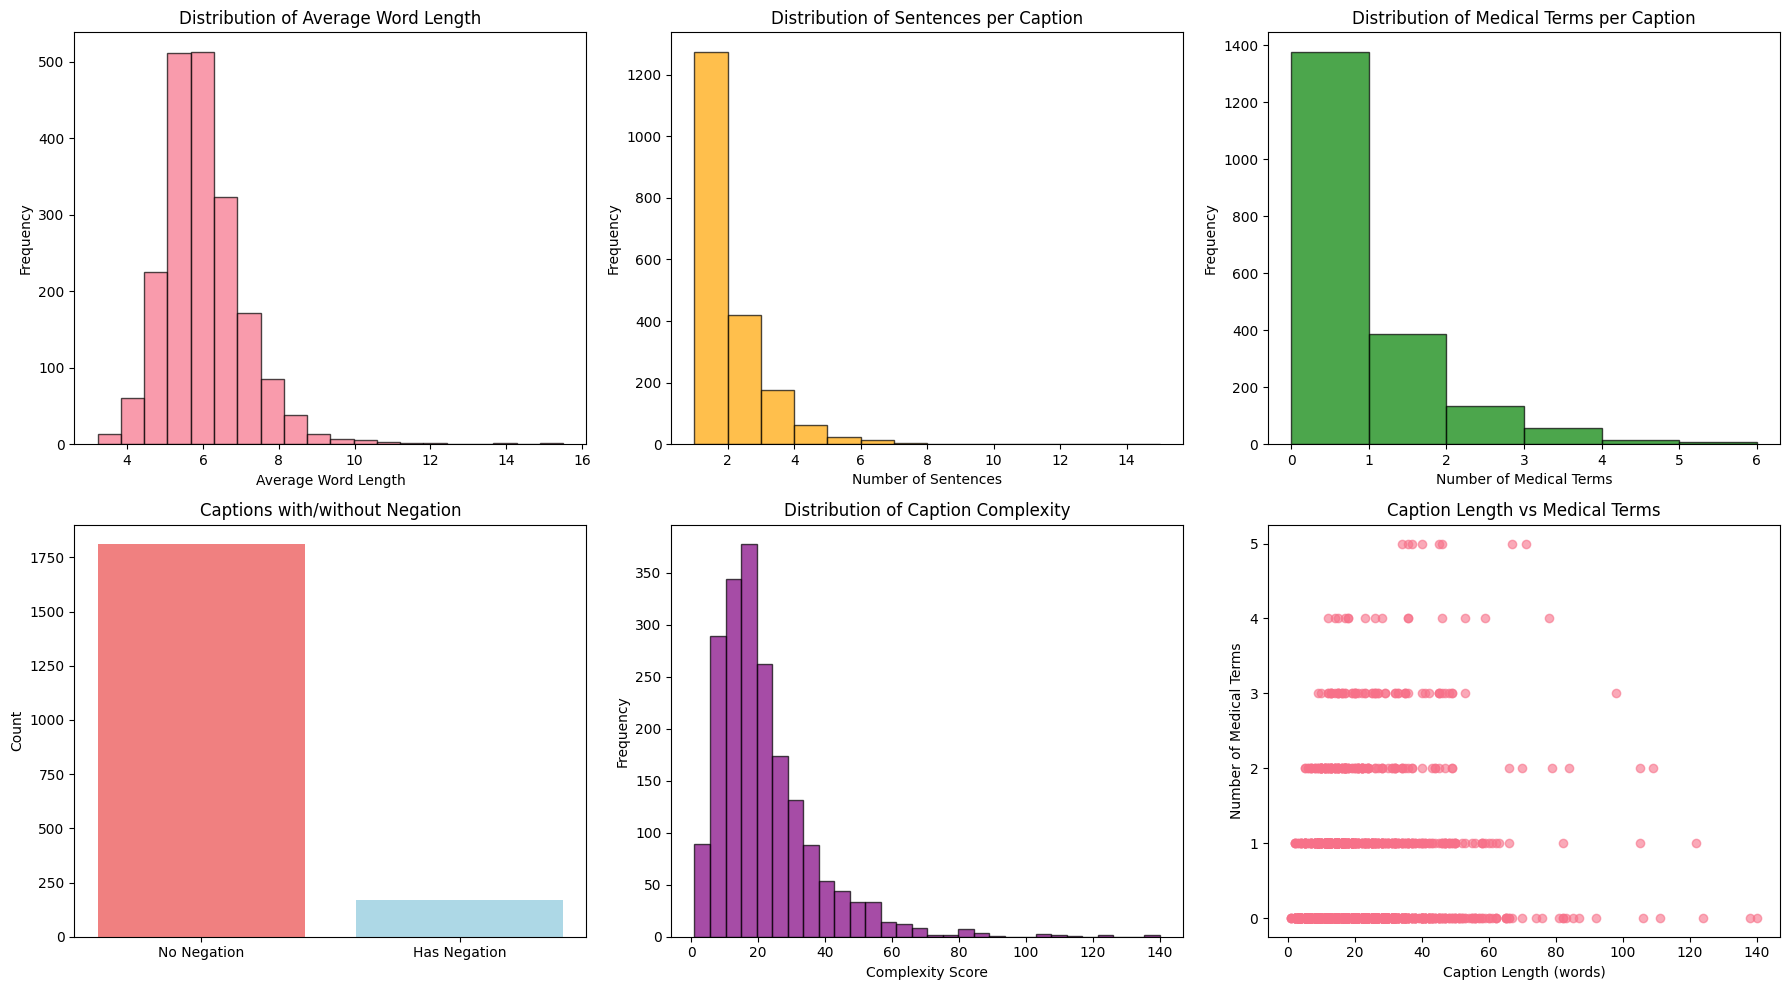

Complexity analysis:
  Average word length: 6.02
  Captions with negation: 168/1978 (8.5%)
  Average medical terms per caption: 0.47


In [11]:
def analyze_caption_complexity(captions):
    """Analyze linguistic complexity of captions"""

    complexity_metrics = {
        "avg_word_length": [],
        "num_sentences": [],
        "num_medical_terms": [],
        "has_negation": [],
        "complexity_score": [],
    }

    negation_words = [
        "no",
        "not",
        "without",
        "absent",
        "negative",
        "clear",
        "unremarkable",
    ]

    for caption in captions:
        words = caption.lower().split()

        # Average word length
        avg_word_len = (
            np.mean([len(word.strip(".,!?")) for word in words]) if words else 0
        )
        complexity_metrics["avg_word_length"].append(avg_word_len)

        # Number of sentences (rough estimate)
        num_sentences = len([s for s in caption.split(".") if s.strip()])
        complexity_metrics["num_sentences"].append(num_sentences)

        # Medical terms count
        medical_count = sum(1 for word in words if word in medical_terms)
        complexity_metrics["num_medical_terms"].append(medical_count)

        # Has negation
        has_neg = any(neg in words for neg in negation_words)
        complexity_metrics["has_negation"].append(has_neg)

        # Simple complexity score
        complexity_score = len(words) + medical_count * 2 + (1 if has_neg else 0)
        complexity_metrics["complexity_score"].append(complexity_score)

    return complexity_metrics


complexity = analyze_caption_complexity(captions)

# Plot complexity metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Average word length
axes[0, 0].hist(complexity["avg_word_length"], bins=20, alpha=0.7, edgecolor="black")
axes[0, 0].set_xlabel("Average Word Length")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Distribution of Average Word Length")

# Number of sentences
axes[0, 1].hist(
    complexity["num_sentences"],
    bins=range(1, max(complexity["num_sentences"]) + 2),
    alpha=0.7,
    edgecolor="black",
    color="orange",
)
axes[0, 1].set_xlabel("Number of Sentences")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Distribution of Sentences per Caption")

# Medical terms
axes[0, 2].hist(
    complexity["num_medical_terms"],
    bins=range(0, max(complexity["num_medical_terms"]) + 2),
    alpha=0.7,
    edgecolor="black",
    color="green",
)
axes[0, 2].set_xlabel("Number of Medical Terms")
axes[0, 2].set_ylabel("Frequency")
axes[0, 2].set_title("Distribution of Medical Terms per Caption")

# Negation presence
negation_counts = Counter(complexity["has_negation"])
axes[1, 0].bar(
    ["No Negation", "Has Negation"],
    [negation_counts[False], negation_counts[True]],
    color=["lightcoral", "lightblue"],
)
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_title("Captions with/without Negation")

# Complexity score
axes[1, 1].hist(
    complexity["complexity_score"],
    bins=30,
    alpha=0.7,
    edgecolor="black",
    color="purple",
)
axes[1, 1].set_xlabel("Complexity Score")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_title("Distribution of Caption Complexity")

# Correlation between word count and medical terms
axes[1, 2].scatter(caption_lengths, complexity["num_medical_terms"], alpha=0.6)
axes[1, 2].set_xlabel("Caption Length (words)")
axes[1, 2].set_ylabel("Number of Medical Terms")
axes[1, 2].set_title("Caption Length vs Medical Terms")

plt.tight_layout()
plt.show()

print("Complexity analysis:")
print(f"  Average word length: {np.mean(complexity['avg_word_length']):.2f}")
print(
    f"  Captions with negation: {sum(complexity['has_negation'])}/{len(complexity['has_negation'])} ({100 * sum(complexity['has_negation']) / len(complexity['has_negation']):.1f}%)"
)
print(
    f"  Average medical terms per caption: {np.mean(complexity['num_medical_terms']):.2f}"
)


In [ ]:
# Find interesting examples
print("=== INTERESTING EXAMPLES ===\n")

# Longest caption
longest_idx = np.argmax(caption_lengths)
print(f"LONGEST CAPTION ({caption_lengths[longest_idx]} words):")
print(f"Caption: {captions[longest_idx]}")
print()

# Shortest caption
shortest_idx = np.argmin(caption_lengths)
print(f"SHORTEST CAPTION ({caption_lengths[shortest_idx]} words):")
print(f"Caption: {captions[shortest_idx]}")
print()

# Most medical terms
most_medical_idx = np.argmax(complexity["num_medical_terms"])
print(
    f"MOST MEDICAL TERMS ({complexity['num_medical_terms'][most_medical_idx]} terms):"
)
print(f"Caption: {captions[most_medical_idx]}")
print()

# Examples with negation
negation_examples = [
    i for i, has_neg in enumerate(complexity["has_negation"]) if has_neg
]
if negation_examples:
    print("EXAMPLES WITH NEGATION:")
    for i, idx in enumerate(negation_examples[:3]):
        print(f"{i + 1}. {captions[idx]}")
    print()

# %%
# Summary statistics
print("=== DATASET SUMMARY ===")
print(f"Total samples: {len(train_data)}")
print(f"Average caption length: {np.mean(caption_lengths):.1f} words")
print(f"Vocabulary size: {len(word_freq)} unique words")
print(
    f"Most common word: '{word_freq.most_common(1)[0][0]}' ({word_freq.most_common(1)[0][1]} times)"
)
print(f"Average image size: {np.mean(widths):.0f} x {np.mean(heights):.0f} pixels")
print(
    f"Captions with medical terminology: {sum(1 for x in complexity['num_medical_terms'] if x > 0)}/{len(complexity['num_medical_terms'])}"
)
print(
    f"Captions with negation: {sum(complexity['has_negation'])}/{len(complexity['has_negation'])}"
)

print(
    "\nThis dataset appears to be well-suited for radiology vision-language model training!"
)


=== INTERESTING EXAMPLES ===

LONGEST CAPTION (140 words):
Caption: The anterior pelvic plane (APP) was the plane formed by both anterior superior iliac spines and the pubic symphysis. APPA was defined as the angle between the line connecting the midpoint of both anterior superior iliac spines to the pubic symphysis and the vertical line of the lateral radiograph of the pelvis in the standing position. Pelvic incidence (PI) is the angle formed by the line connecting the midpoint of the bilateral femoral head center point to the center point of the sacral endplate and the line perpendicular to the sacral endplate. Pelvic tilt (PT) is the angle between the line connecting the midpoint of the bilateral femoral head center point to the center point of the sacral endplate and the vertical line; the sacral slope (SS) is the angle between the superior plate of S1 and the horizontal line.

SHORTEST CAPTION (1 words):
Caption: Pericarditis.

MOST MEDICAL TERMS (5 terms):
Caption: Chest radiogra